## Analyse exploratoire des données du dataset `general_data.csv`

### **Sommaire**


<center><font color="red" size="10">WIP</font></center>


---

### 1. <a id='importation'>Importation des bibliothèques</a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

# Ignorer les avertissements
warnings.filterwarnings('ignore')

DELIMITER = "--------------------------------"

---

### 2. <a id='chargement'>Chargement des données</a>

In [4]:
general_data = pd.read_csv("../data/general_data.csv")

---

### 3. <a id='apercu'>Aperçu général</a>

In [5]:
print(f"Nombre de lignes : {general_data.shape[0]}")
print(f"Nombre de colonnes : {general_data.shape[1]}")

Nombre de lignes : 4410
Nombre de colonnes : 24


In [6]:
print("Informations de base :")
general_data.info()

Informations de base :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  N

In [7]:
print(f"Sommaire des statistiques : \n{general_data.describe()}")

Sommaire des statistiques : 
               Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4391.000000        4410.000000   
mean      2.063946   65029.312925            2.694830          15.209524   
std       1.1

In [8]:
print("Nombre de valeurs uniques par colonne :")
for column in general_data.columns:
    print(f"- {column} : {general_data[column].nunique()} valeurs uniques")

Nombre de valeurs uniques par colonne :
- Age : 43 valeurs uniques
- Attrition : 2 valeurs uniques
- BusinessTravel : 3 valeurs uniques
- Department : 3 valeurs uniques
- DistanceFromHome : 29 valeurs uniques
- Education : 5 valeurs uniques
- EducationField : 6 valeurs uniques
- EmployeeCount : 1 valeurs uniques
- EmployeeID : 4410 valeurs uniques
- Gender : 2 valeurs uniques
- JobLevel : 5 valeurs uniques
- JobRole : 9 valeurs uniques
- MaritalStatus : 3 valeurs uniques
- MonthlyIncome : 1349 valeurs uniques
- NumCompaniesWorked : 10 valeurs uniques
- Over18 : 1 valeurs uniques
- PercentSalaryHike : 15 valeurs uniques
- StandardHours : 1 valeurs uniques
- StockOptionLevel : 4 valeurs uniques
- TotalWorkingYears : 40 valeurs uniques
- TrainingTimesLastYear : 7 valeurs uniques
- YearsAtCompany : 37 valeurs uniques
- YearsSinceLastPromotion : 16 valeurs uniques
- YearsWithCurrManager : 18 valeurs uniques


In [9]:
display(general_data.head())

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


---

### 4. <a id='missing-check'>Gestion des valeurs manquantes</a>

In [10]:
if (general_data.isnull().sum() > 0).any():
    missing_values = general_data.isnull().sum()[general_data.isnull().sum() > 0]
    missing_percentage = (missing_values / len(general_data) * 100).round(2)
    print("Valeurs manquantes par colonne :")
    for col in missing_values.index:
        print(f"{col} : {missing_values[col]} valeurs ({missing_percentage[col]}%)")
else:
    print("Il n'y a pas de valeurs manquantes dans le dataset")

Valeurs manquantes par colonne :
NumCompaniesWorked : 19 valeurs (0.43%)
TotalWorkingYears : 9 valeurs (0.2%)


Comme le nombre de valeurs manquantes est très faible (> 1% des données), nous pouvons nous permettre de visualiser les distributions des variables avant de décider de quelle manière gérer les valeurs manquantes.


---

### 5. <a id='doublons'>Gestion des valeurs dupliquées</a>

In [11]:
if general_data.duplicated().sum() > 0:
    print(f"Nombre de valeurs dupliquées : {general_data.duplicated().sum()}")
    general_data = general_data.drop_duplicates()
    print(f"Nombre de lignes après suppression des doublons : {general_data.shape[0]}")
else:
    print("Il n'y a pas de valeurs dupliquées dans le dataset")

Il n'y a pas de valeurs dupliquées dans le dataset


---

### 6. <a id='types'>Vérification des types de données</a>

In [12]:
numerical_columns = general_data.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    invalid_values = general_data[column].apply(lambda x: isinstance(x, (str)))
    if invalid_values.any():
        print(f"La colonne {column} contient des valeurs non numériques :")
        print(general_data[invalid_values][column])
        print(DELIMITER)

if not invalid_values.any():
    print("Aucune valeur non numérique a été trouvée dans les colonnes numériques")

Aucune valeur non numérique a été trouvée dans les colonnes numériques


In [13]:
categorical_columns = general_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Vérification des valeurs uniques dans la colonne {column}")
    print(general_data[column].unique())
    print(DELIMITER)

Vérification des valeurs uniques dans la colonne Attrition
['No' 'Yes']
--------------------------------
Vérification des valeurs uniques dans la colonne BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
--------------------------------
Vérification des valeurs uniques dans la colonne Department
['Sales' 'Research & Development' 'Human Resources']
--------------------------------
Vérification des valeurs uniques dans la colonne EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
--------------------------------
Vérification des valeurs uniques dans la colonne Gender
['Female' 'Male']
--------------------------------
Vérification des valeurs uniques dans la colonne JobRole
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
--------------------------------
Vérification des valeurs uniqu

---

### 7. <a id='resume'>Résumé initial du dataset</a>

**Structure générale**
- Nombre de lignes : 4410
- Nombre de colonnes : 24

‎ 

**Tableau descriptif**
| #  | Colonne                     | Type      | Description                                    | Valeurs manquantes | Moyenne   | Médiane | Min | Max      |
|----|-----------------------------|-----------|-----------------------------------------------|--------------------|-----------|---------|-----|----------|
| 1  | Age                         | int64     | Âge des employés                              | 0                  | 36.92     | 36      | 18  | 60       |
| 2  | Attrition                   | object    | Indique si l'employé a quitté l'entreprise    | 0                  | -         | -       | -   | -        |
| 3  | BusinessTravel              | object    | Fréquence des déplacements professionnels     | 0                  | -         | -       | -   | -        |
| 4  | Department                  | object    | Département auquel l'employé appartient       | 0                  | -         | -       | -   | -        |
| 5  | DistanceFromHome            | int64     | Distance entre domicile et lieu de travail    | 0                  | 9.19      | 7       | 1   | 29       |
| 6  | Education                   | int64     | Niveau d'éducation (1 à 5)                    | 0                  | 2.91      | 3       | 1   | 5        |
| 7  | EducationField              | object    | Domaine d'étude                               | 0                  | -         | -       | -   | -        |
| 8  | EmployeeCount               | int64     | Toujours égal à 1                             | 0                  | 1.0       | 1       | 1   | 1        |
| 9  | EmployeeID                  | int64     | Identifiant unique pour chaque employé        | 0                  | -         | -       | 1   | 4410     |
| 10 | Gender                      | object    | Genre de l'employé                            | 0                  | -         | -       | -   | -        |
| 11 | JobLevel                    | int64     | Niveau de poste (1 à 5)                       | 0                  | 2.06      | 2       | 1   | 5        |
| 12 | JobRole                     | object    | Intitulé du poste                             | 0                  | -         | -       | -   | -        |
| 13 | MaritalStatus               | object    | État civil                                    | 0                  | -         | -       | -   | -        |
| 14 | MonthlyIncome               | int64     | Revenu mensuel (en dollars)                  | 0                  | 65,029    | 49,190  | 10,090 | 199,990 |
| 15 | NumCompaniesWorked          | float64   | Nombre d'entreprises où l'employé a travaillé| 19                 | 2.69      | 2       | 0   | 9        |
| 16 | Over18                      | object    | Toujours "Y"                                | 0                  | -         | -       | -   | -        |
| 17 | PercentSalaryHike           | int64     | Augmentation de salaire en %                  | 0                  | 15.21     | 14      | 11  | 25       |
| 18 | StandardHours               | int64     | Toujours égal à 8                             | 0                  | 8.0       | 8       | 8   | 8        |
| 19 | StockOptionLevel            | int64     | Niveau d'options sur actions (0 à 3)         | 0                  | 0.79      | 1       | 0   | 3        |
| 20 | TotalWorkingYears           | float64   | Années totales d'expérience                  | 9                  | 11.28     | 10      | 0   | 40       |
| 21 | TrainingTimesLastYear       | int64     | Nombre de formations l'année précédente       | 0                  | 2.80      | 3       | 0   | 6        |
| 22 | YearsAtCompany              | int64     | Années passées dans l'entreprise              | 0                  | 7.01      | 5       | 0   | 40       |
| 23 | YearsSinceLastPromotion     | int64     | Années depuis la dernière promotion           | 0                  | 2.19      | 1       | 0   | 15       |
| 24 | YearsWithCurrManager        | int64     | Années passées avec le manager actuel         | 0                  | 4.12      | 3       | 0   | 17       |


‎

**Points notables**
- Aucune valeur en double n’est présente dans le dataset, ce qui évite les problématiques de déduplication.  
- Le nombre de valeurs manquantes est limité, avec moins de 1 % des données affectées.
- Pas de faute de saisie dans les colonnes, chaque donnée respecte le format indiqué.
- Les données sont cohérentes avec le contexte donné.
- La majorité des colonnes numériques présentent des distributions équilibrées autour de leurs médianes (souvent proches des moyennes).  
- Les colonnes comme `StandardHours`, `EmployeeCount` et `Over18` ont des valeurs constantes, ce qui simplifie leur gestion dans l’analyse.

---

### 8. <a id='distributions'>Analyse des distributions</a>

#### 8.1. Sélection des colonnes pertinentes

Les colonnes suivantes ne seront pas considérées dans le cadre de cette analyse :
- `EmployeeID` : Cette colonne est un identifiant unique pour chaque employé.
- `EmployeeCount` : Cette colonne est une constante égale à 1.
- `StandardHours` : Cette colonne est une constante égale à 8.
- `Over18` : Cette colonne est une constante égale à "Y".

In [14]:
numerical_columns = numerical_columns.drop(['EmployeeID', 'EmployeeCount', 'StandardHours'])
print(f"Colonnes numériques : {numerical_columns.tolist()}")

categorical_columns = categorical_columns.drop('Over18')
print(f"Colonnes catégoriques : {categorical_columns.tolist()}")

Colonnes numériques : ['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Colonnes catégoriques : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']


──────────────────────────────────────────────────

#### 8.2. Colonnes numériques

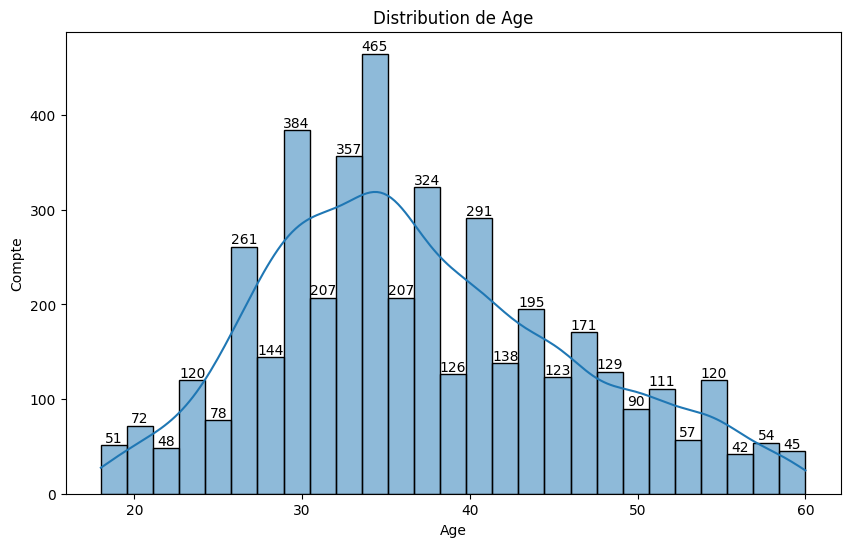

--------------------------------


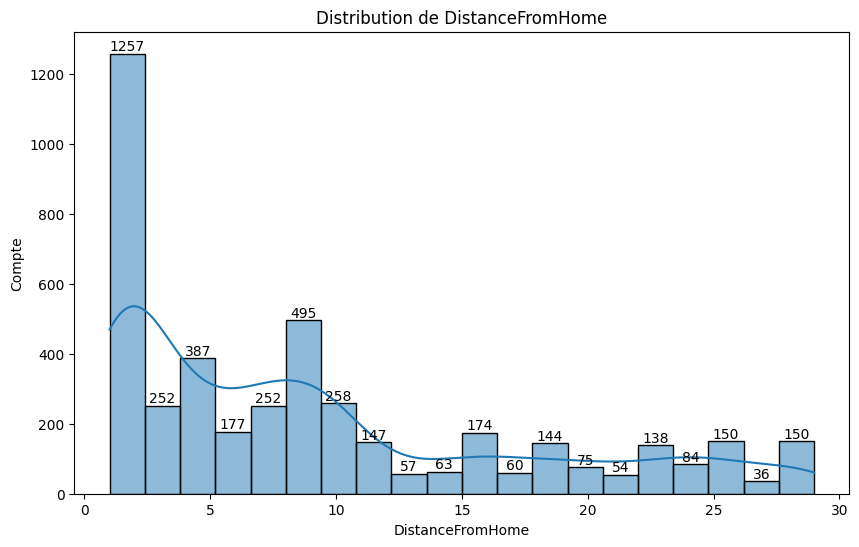

--------------------------------


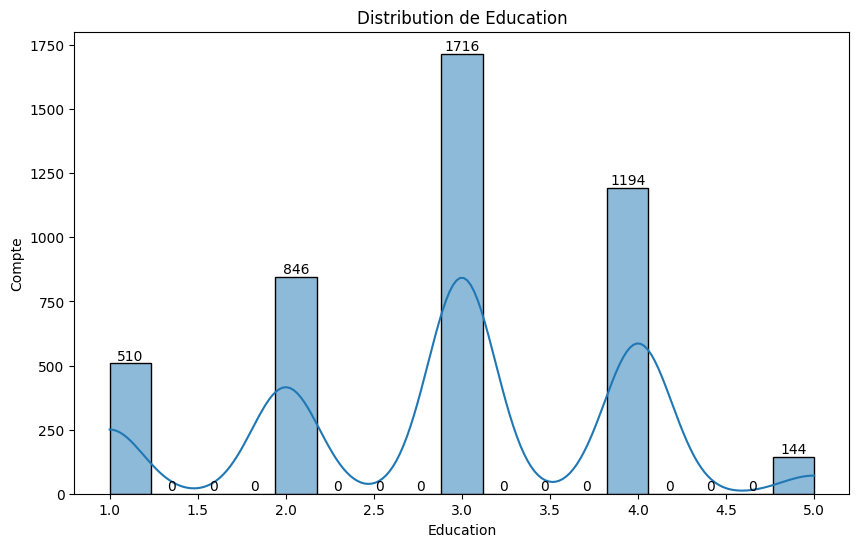

--------------------------------


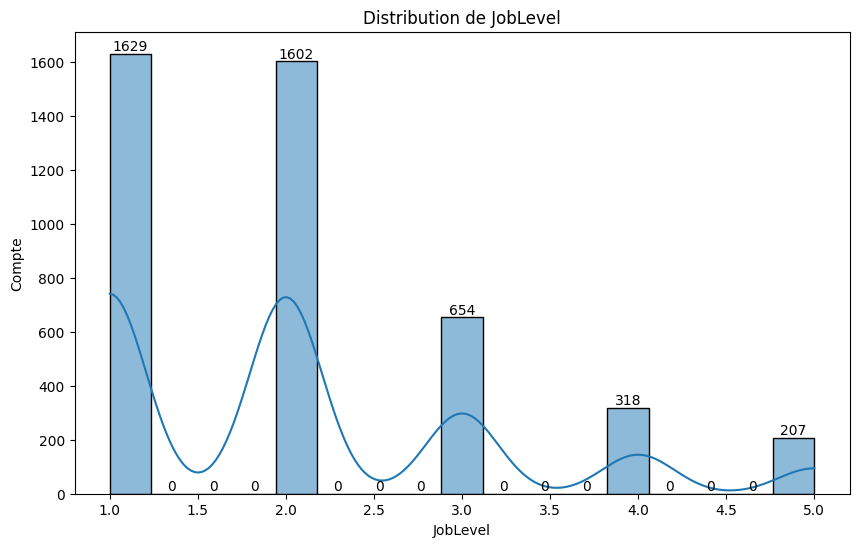

--------------------------------


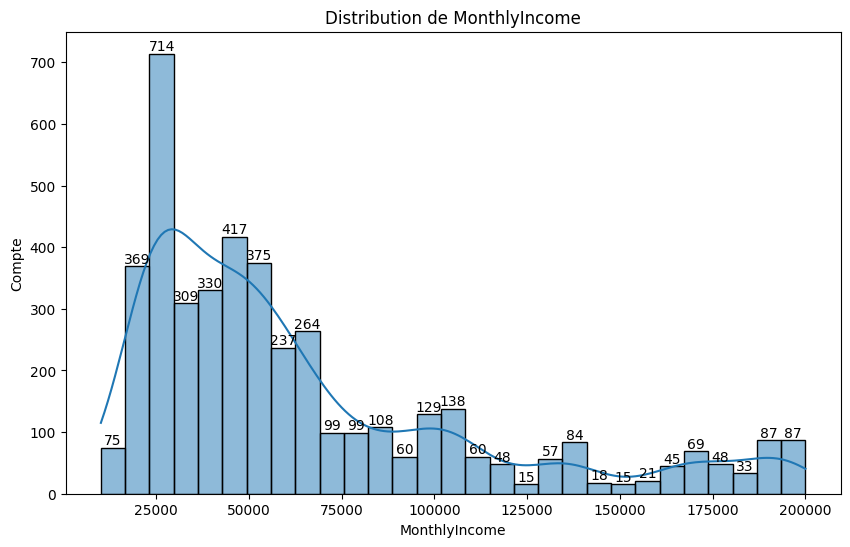

--------------------------------


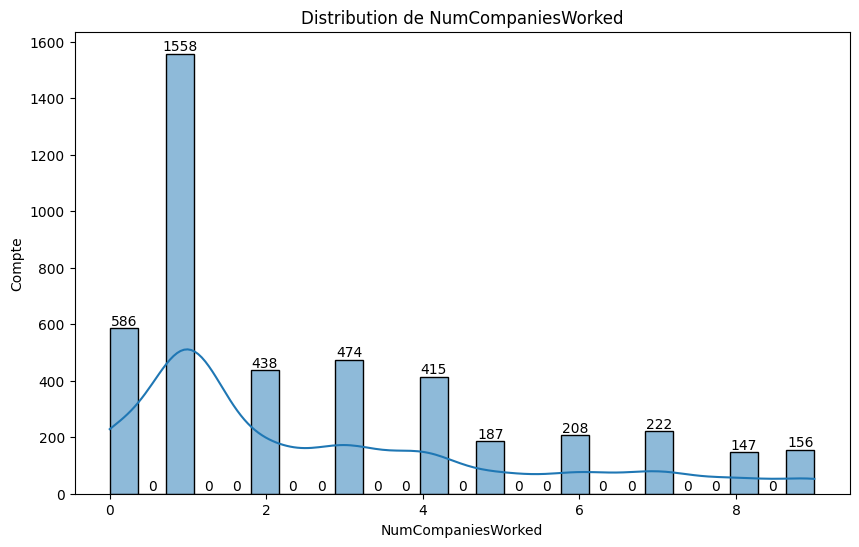

--------------------------------


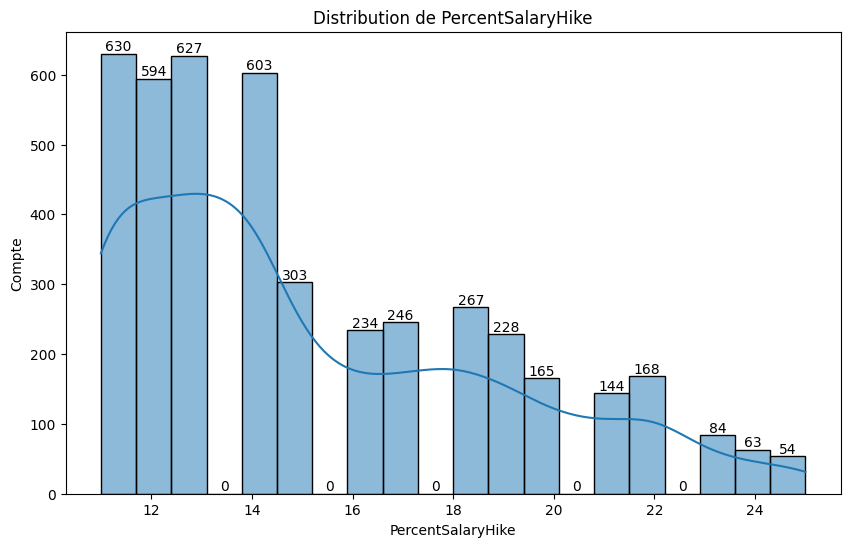

--------------------------------


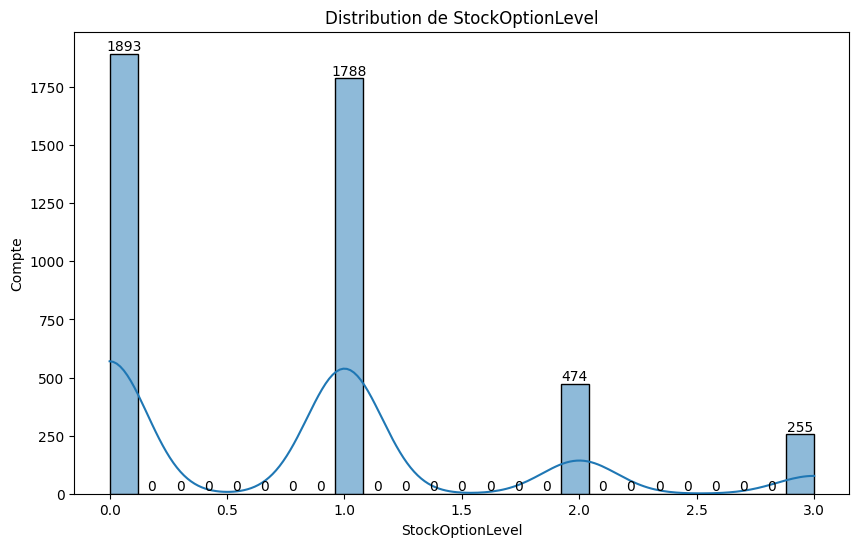

--------------------------------


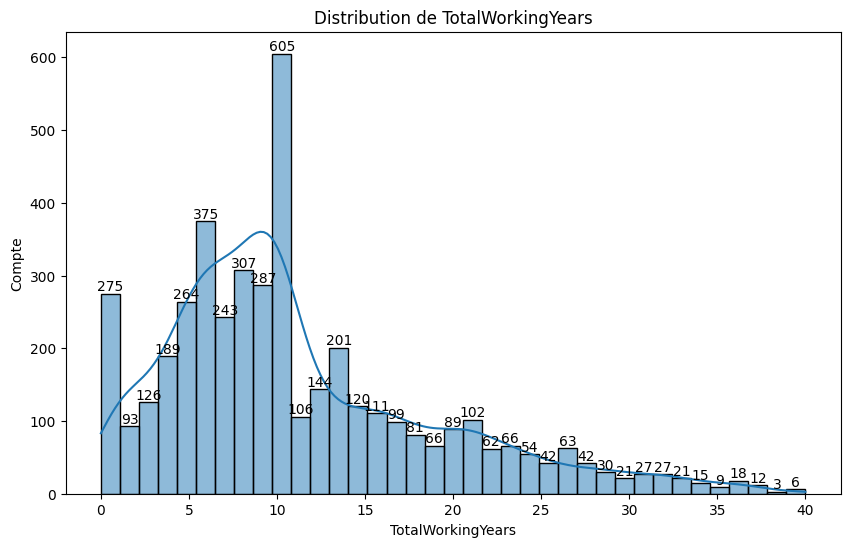

--------------------------------


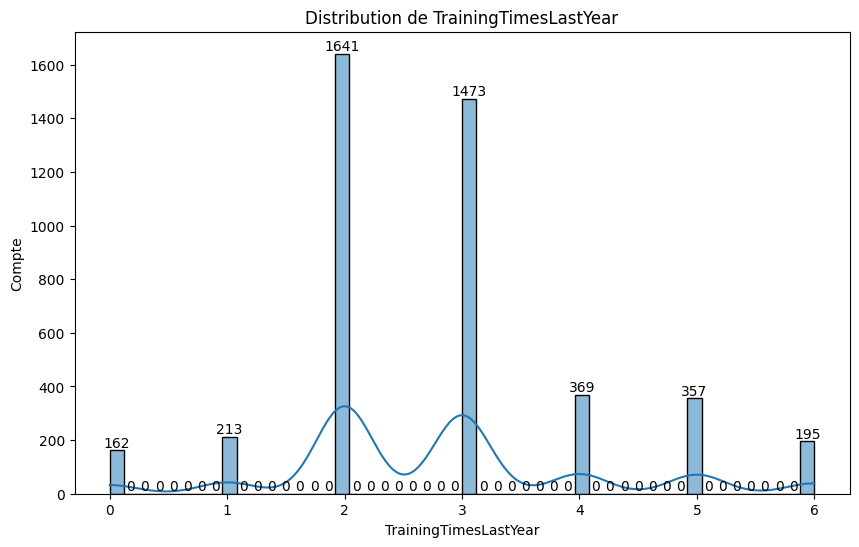

--------------------------------


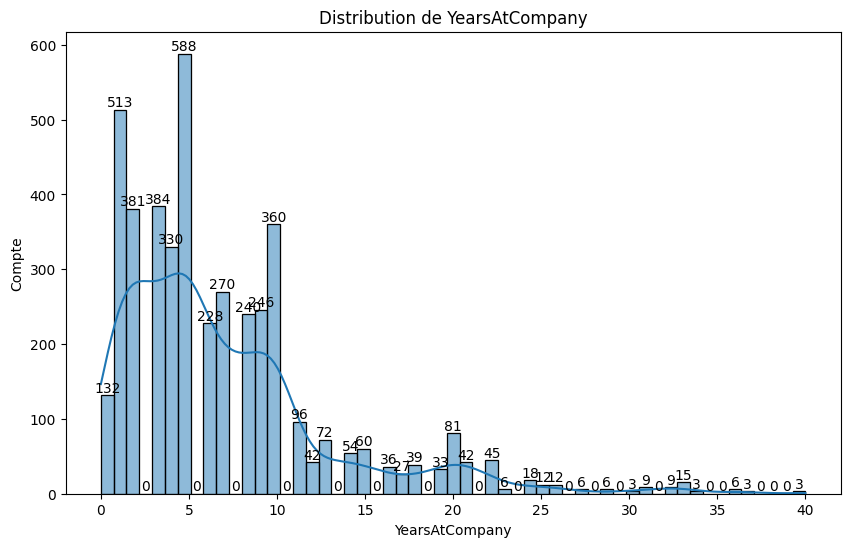

--------------------------------


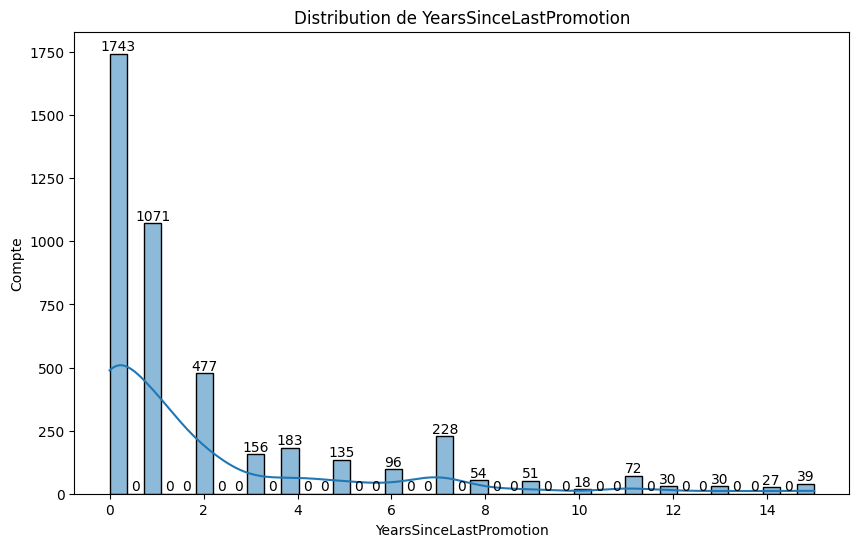

--------------------------------


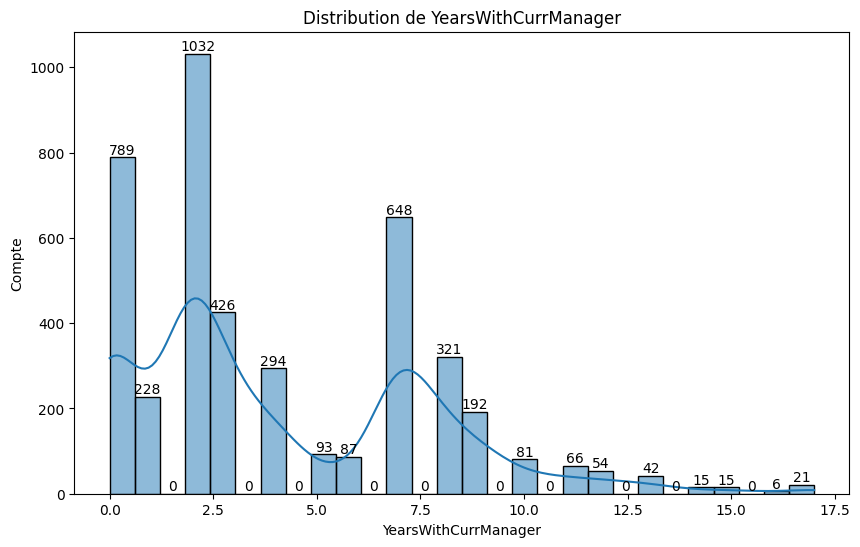

--------------------------------


In [15]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(general_data[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Compte')

    # Ajouter les valeurs sur le graphe
    for i in ax.containers:
        ax.bar_label(i)

    plt.show()
    print(DELIMITER)

**Tableau descriptif**
| Variable                    | Observations                                                                                      | Interprétations                                                                                      |
|-----------------------------|--------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| **Age**                    | Distribution légèrement asymétrique vers la droite. La majorité a entre 30 et 40 ans.           | La population est principalement d'âge moyen, avec moins de jeunes et de seniors.                 |
| **DistanceFromHome**       | Distribution fortement biaisée vers la gauche. La majorité habite à moins de 5 km.              | Préférence ou politique favorisant les employés vivant près du lieu de travail.                   |
| **Education**              | Niveaux 3 et 4 dominants, niveaux 1 et 5 rares.                                                 | Recrutement ciblant des employés avec un niveau d'éducation intermédiaire à élevé.                |
| **JobLevel**               | Niveaux 1 et 2 largement dominants, niveaux 4 et 5 rares.                                       | La majorité des employés occupent des postes de début ou intermédiaires dans la hiérarchie.       |
| **MonthlyIncome**          | Concentration élevée dans la plage basse (25,000 à 50,000). Les revenus élevés sont rares.      | Structure salariale où la majorité des postes sont intermédiaires ou d'entrée, peu de postes très rémunérateurs. |
| **NumCompaniesWorked**     | Distribution biaisée à gauche, beaucoup d'employés ayant travaillé dans 0 à 2 entreprises.      | Une stabilité relative des employés ou une population en début de carrière.                       |
| **PercentSalaryHike**      | Augmentations majoritairement entre 11 % et 16 %, diminuant après.                              | Politique d'augmentation salariale modérée, avec peu d'augmentations significatives.              |
| **StockOptionLevel**       | Niveaux 0 et 1 dominants, niveaux 2 et 3 rares.                                                 | Les options sur actions sont limitées à certains niveaux de responsabilité.                       |
| **TotalWorkingYears**      | La majorité a entre 5 et 15 ans d'expérience, peu au-delà de 30 ans.                            | Une population d'employés avec une expérience significative, mais peu d'anciens.                  |
| **TrainingTimesLastYear**  | La majorité a suivi 2 à 3 formations l'année dernière. Certains n'ont eu aucune formation.       | Une culture de formation continue, mais certains employés peuvent être exclus.                    |
| **YearsAtCompany**         | La majorité a travaillé moins de 10 ans, avec un pic entre 3 et 5 ans. Peu au-delà de 20 ans.   | Rotation élevée des employés ou entreprise relativement jeune, avec des cycles d'embauche marqués. |
| **YearsSinceLastPromotion**| 40 % des employés n'ont pas été promus depuis moins de 2 ans. 28 % depuis au moins 5 ans.        | Promotions modérées et possibles, mais avec des plafonds de carrière pour certains rôles.         |
| **YearsWithCurrManager**   | Pics autour de 2-3 ans et 7 ans avec le même manager. Peu au-delà de 10 ans.                    | Rotation fréquente des managers ou politiques organisationnelles favorisant des évolutions.       |


──────────────────────────────────────────────────

#### 8.3. Colonnes catégoriques


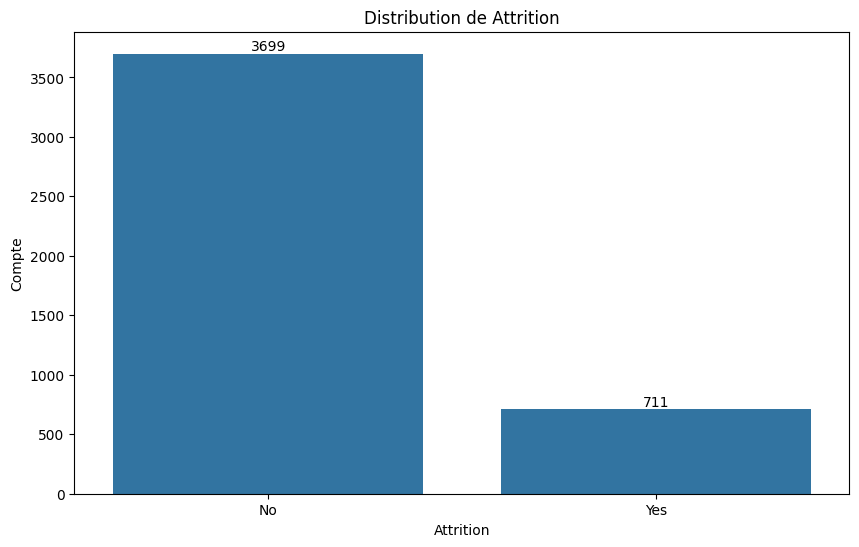

--------------------------------


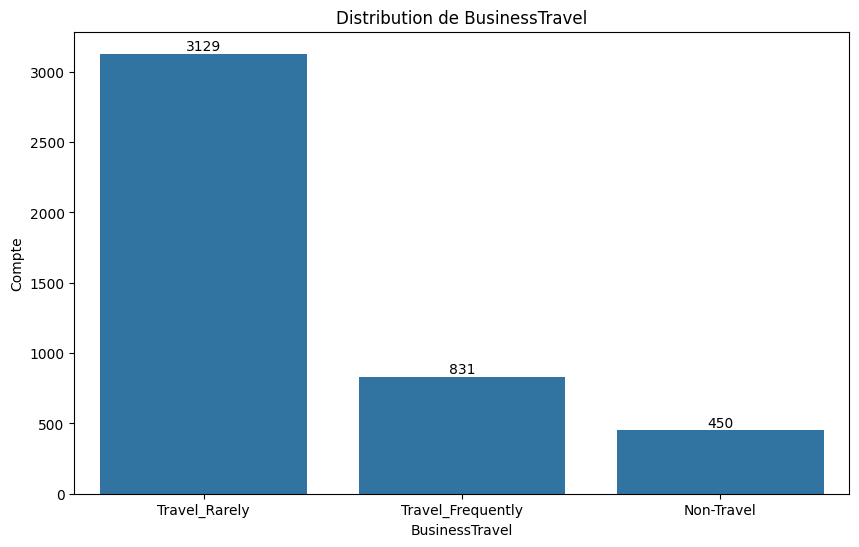

--------------------------------


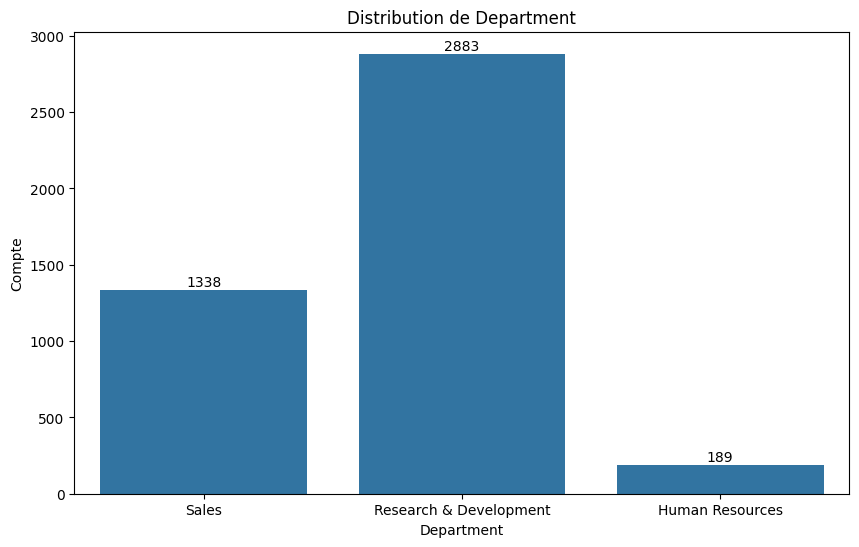

--------------------------------


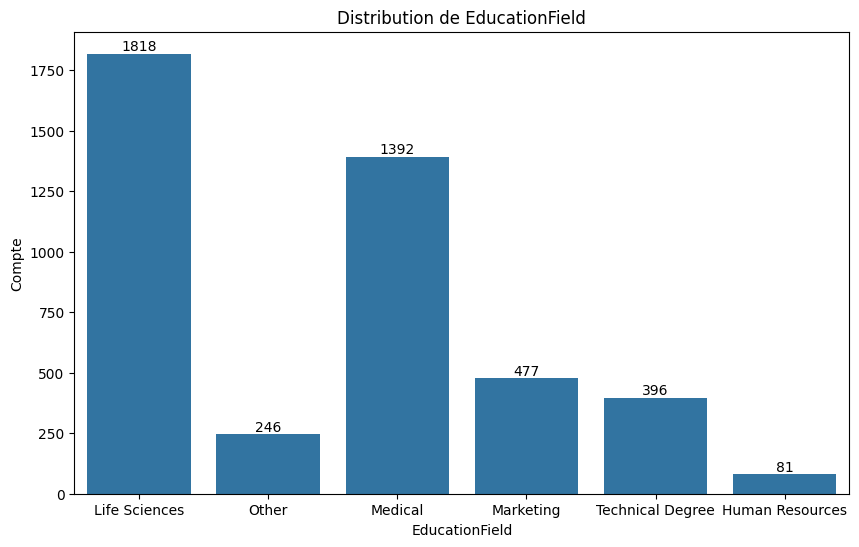

--------------------------------


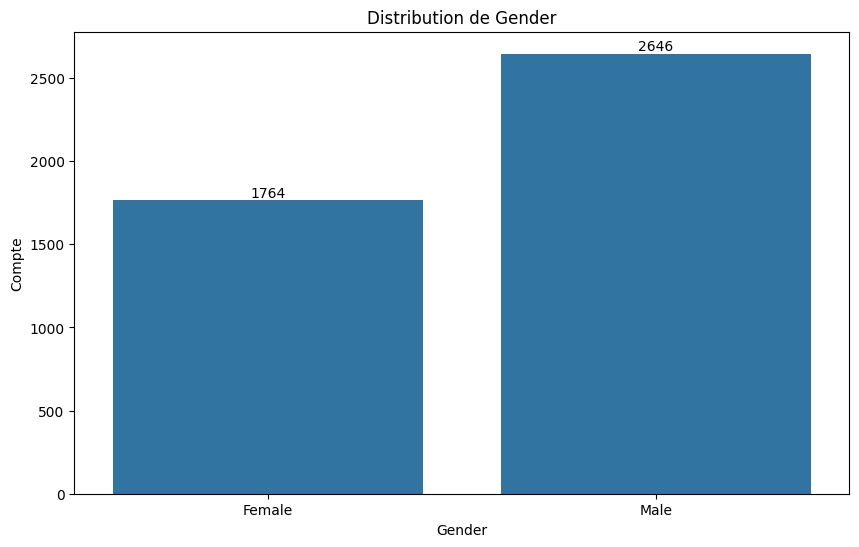

--------------------------------


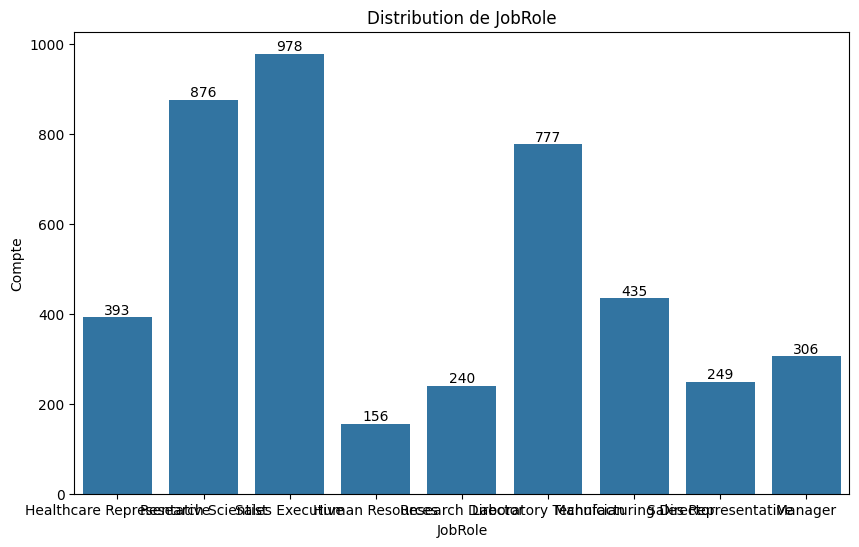

--------------------------------


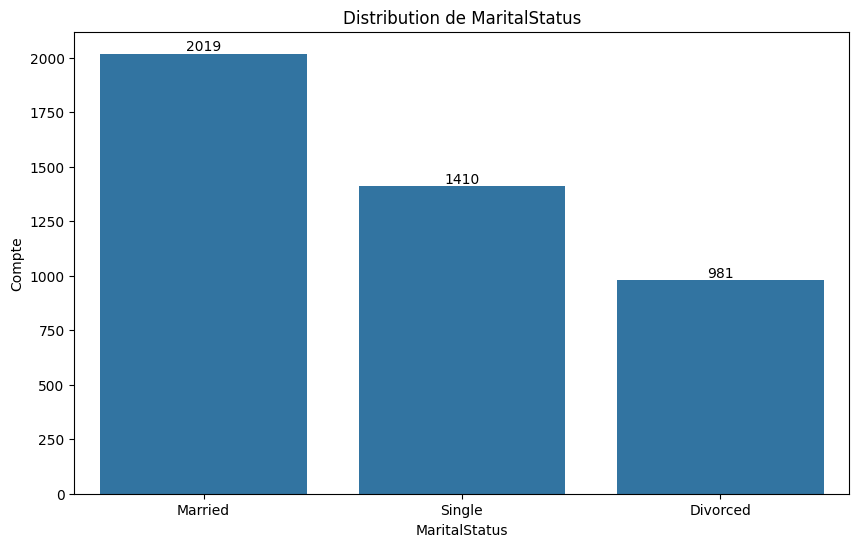

--------------------------------


In [16]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=general_data, x=column)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Compte')

    # Ajouter les valeurs sur le graphe
    for i in ax.containers:
        ax.bar_label(i)

    plt.show()
    print(DELIMITER)

**Tableau descriptif**

| **Variable**          | **Observations**                                                                                       | **Interprétations**                                                                                  |
|------------------------|-------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| **Attrition**          | La majorité des employés (3699) n’ont pas quitté l’entreprise, contre 711 qui l’ont fait.             | Taux d’attrition relativement faible, mais à surveiller pour analyser les facteurs déclencheurs.     |
| **BusinessTravel**     | La majorité des employés voyagent rarement (3129), suivis de ceux qui voyagent fréquemment (831) et non-voyageurs (450). | Une politique de voyages modérée, avec une proportion significative de non-voyageurs.               |
| **Department**         | La majorité des employés (2883) appartiennent au département R&D, suivis des ventes (1338) et des RH (189). | Forte concentration dans la recherche, reflétant une priorité stratégique dans l’organisation.      |
| **EducationField**     | Les sciences de la vie (1818) et le domaine médical (1392) dominent, suivis de marketing et technique. | Une orientation claire vers des domaines spécialisés pour soutenir les activités pharmaceutiques.   |
| **Gender**             | Plus d’hommes (2646) que de femmes (1764).                                                            | Un déséquilibre entre les genres, probablement influencé par des choix de recrutement historiques.  |
| **JobRole**            | Les rôles « Sales Executive » (978) et « Research Scientist » (876) sont les plus communs.            | La répartition reflète la nature des postes stratégiques pour l’entreprise.                        |
| **MaritalStatus**      | La majorité des employés sont mariés (2019), suivis des célibataires (1410) et divorcés (981).         | Une majorité d’employés dans des situations maritales stables, potentiellement liés à la tranche d’âge. |

‎ 

---


### 9. <a id='missing-handling'>Traitement des valeurs manquantes</a>

Comme observé précédemment, il y a très peu de valeurs manquantes dans le dataset. Pour rappel, voici les colonnes concernées :

- `NumCompaniesWorked` : 19 valeurs manquantes
- `TotalWorkingYears` : 9 valeurs manquantes

Maintenant que la distribution des données est connue, nous pouvons décider de quelle manière gérer les valeurs manquantes.

#### 9.1. `NumCompaniesWorked`

Puisque cette colonne contient des valeurs numériques *discrètes* décrivant le nombre d'entreprises où l'employé a travaillé et qu'elle montre une distribution asymétrique, nous pouvons remplacer les valeurs manquantes par la médiane de la colonne.


In [17]:
general_data['NumCompaniesWorked'].fillna(general_data['NumCompaniesWorked'].median(), inplace=True)
print(f"Nombre de valeurs manquantes dans NumCompaniesWorked après imputation : {general_data['NumCompaniesWorked'].isna().sum()}")

Nombre de valeurs manquantes dans NumCompaniesWorked après imputation : 0


──────────────────────────────────────────────────

#### 9.2. `TotalWorkingYears`

Puisque cette colonne contient des valeurs numériques *discrètes* décrivant le nombre d'années d'expérience dans l'entreprise et qu'elle montre une distribution asymétrique elle aussi, nous pouvons remplacer les valeurs manquantes par la médiane de la colonne.

In [18]:
general_data['TotalWorkingYears'].fillna(general_data['TotalWorkingYears'].median(), inplace=True)
print(f"Nombre de valeurs manquantes dans TotalWorkingYears après imputation : {general_data['TotalWorkingYears'].isna().sum()}")

Nombre de valeurs manquantes dans TotalWorkingYears après imputation : 0


---

### 10. <a id='outliers'>Détection des valeurs aberrantes</a>

#### 10.1. Génération des boxplots

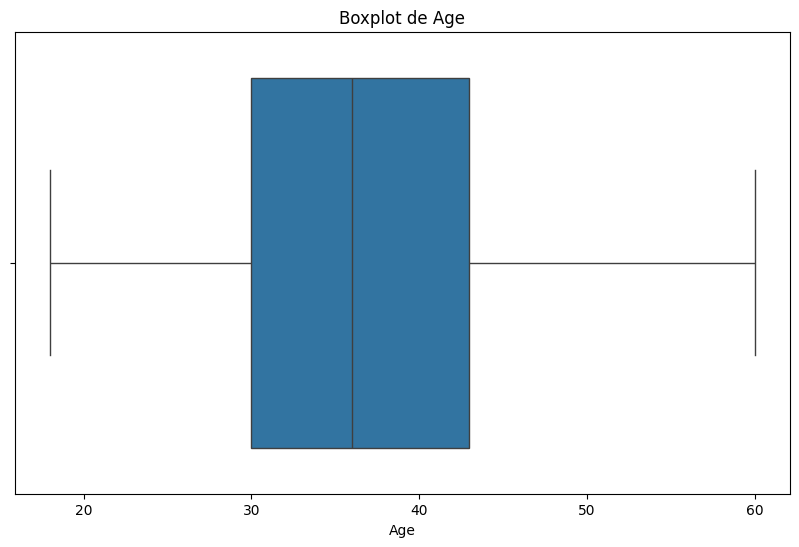

--------------------------------


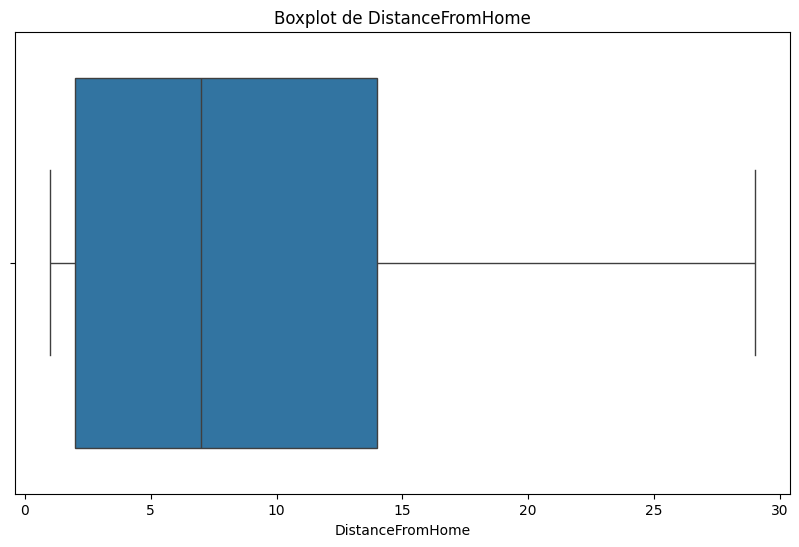

--------------------------------


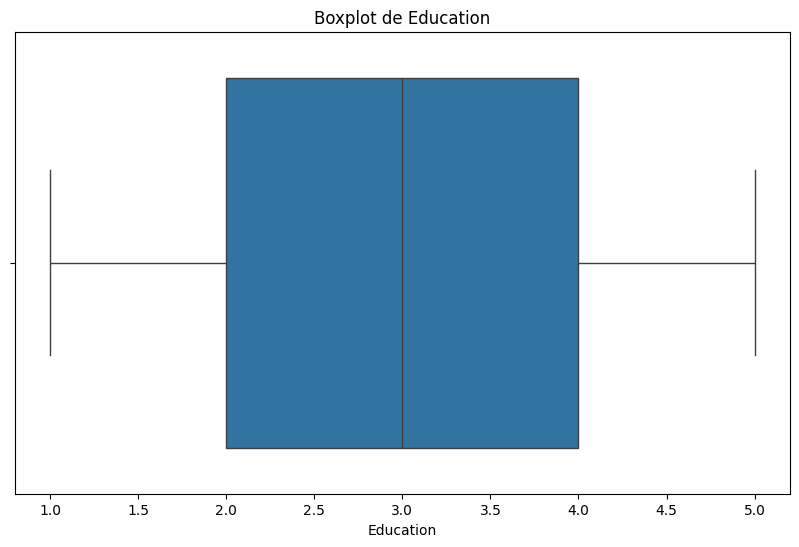

--------------------------------


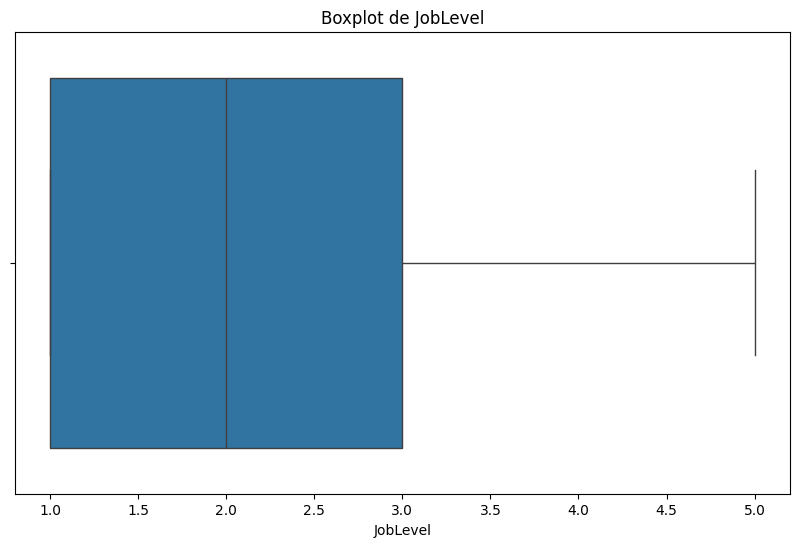

--------------------------------


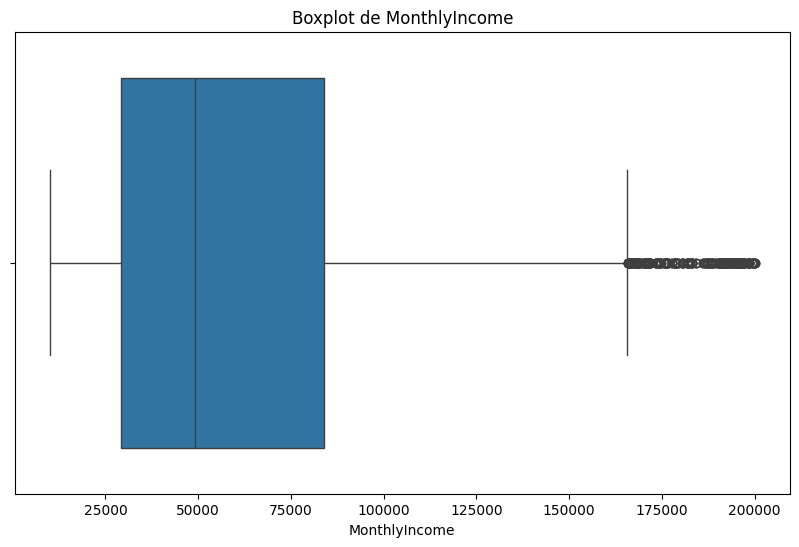

--------------------------------


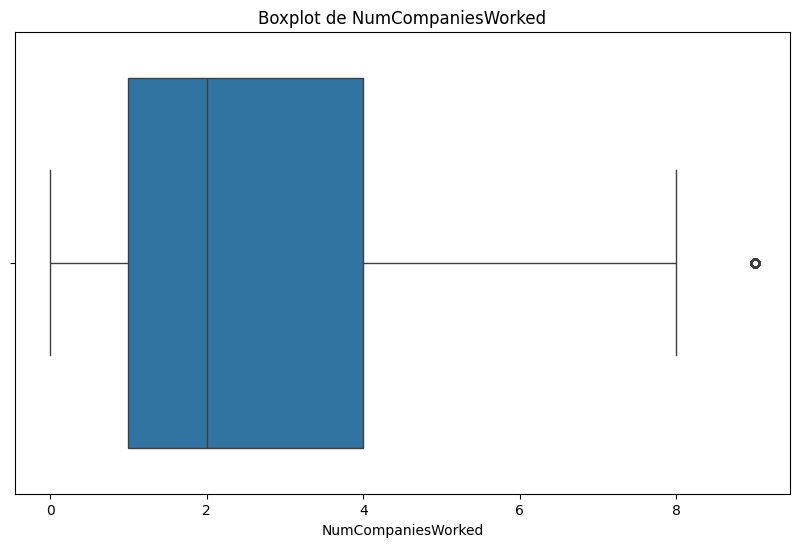

--------------------------------


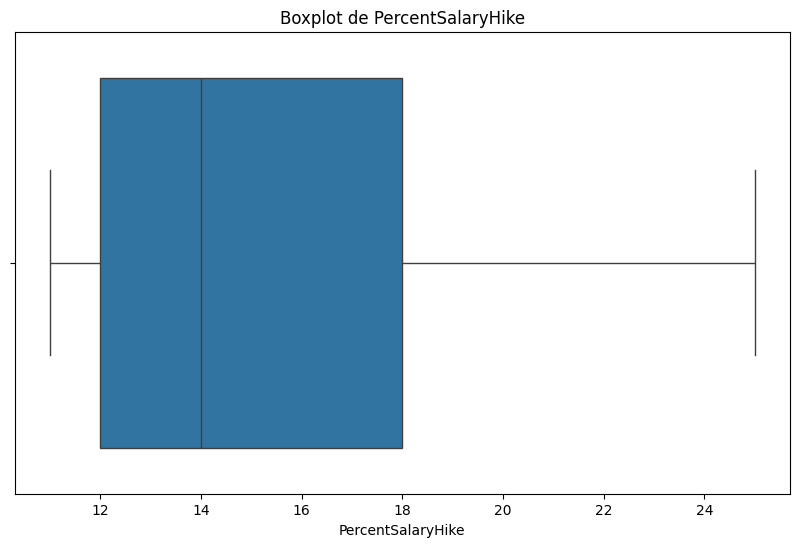

--------------------------------


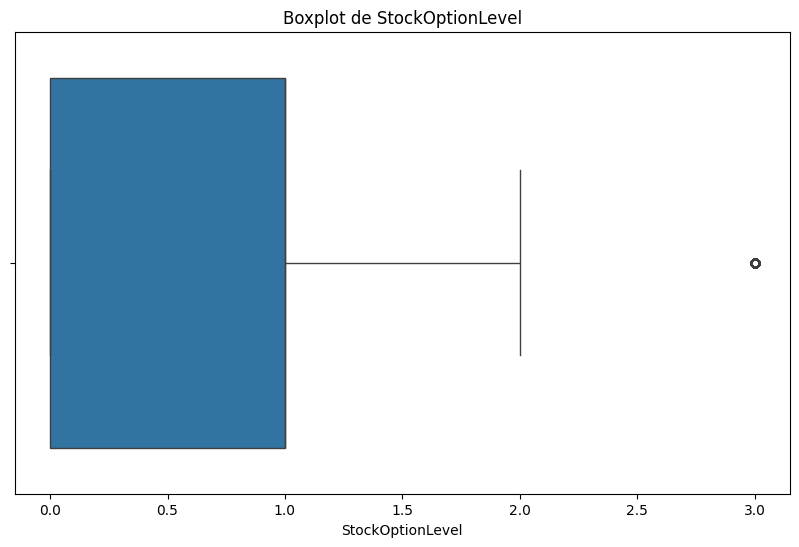

--------------------------------


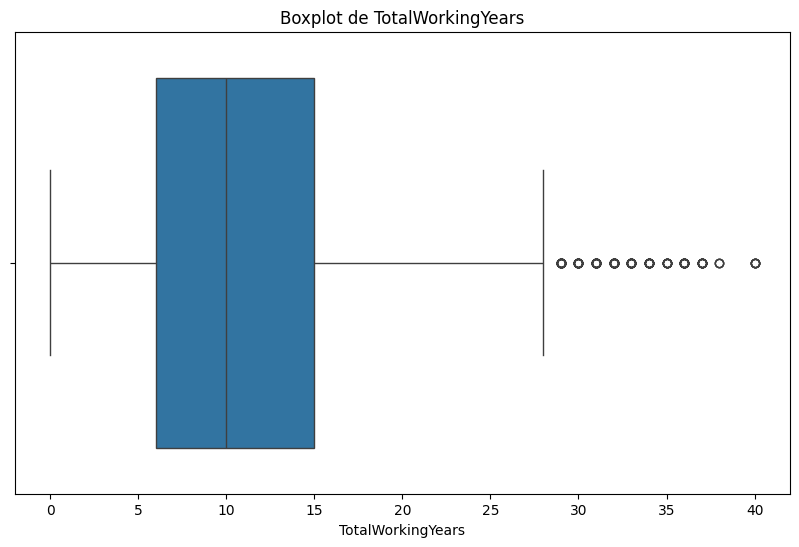

--------------------------------


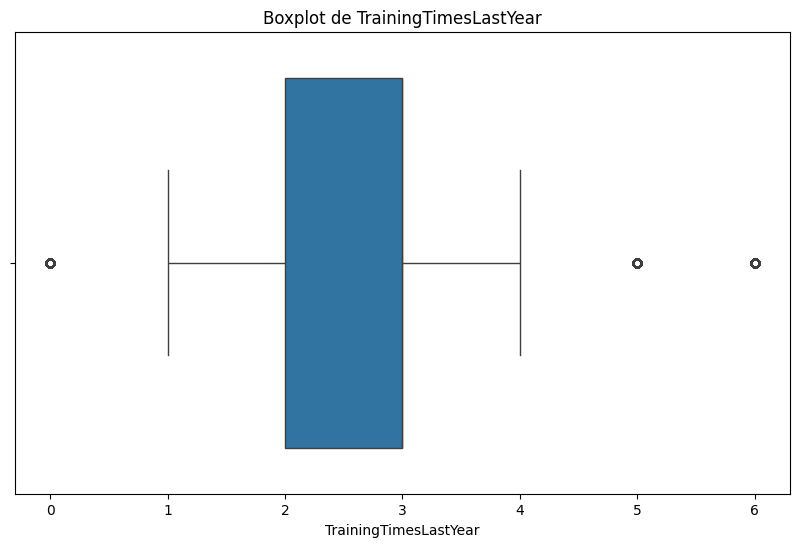

--------------------------------


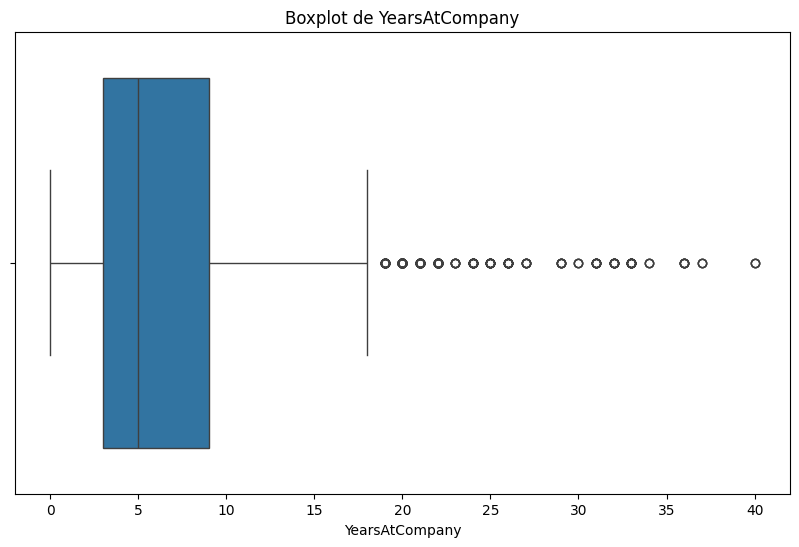

--------------------------------


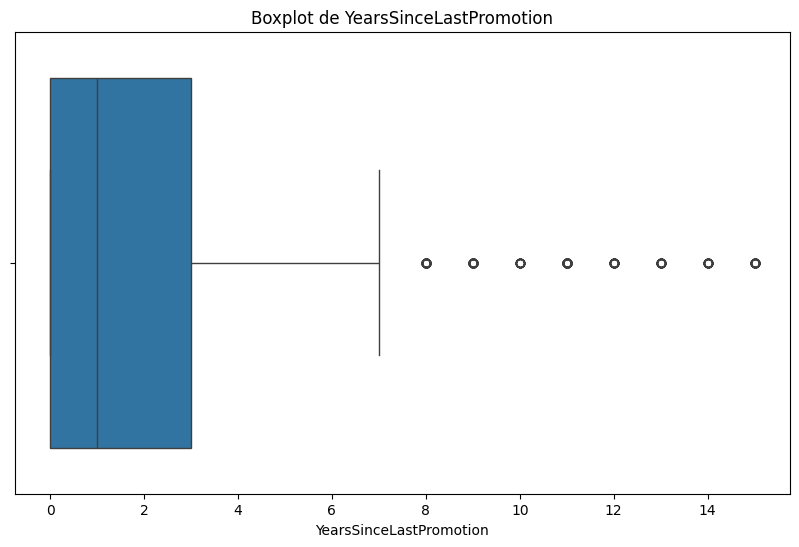

--------------------------------


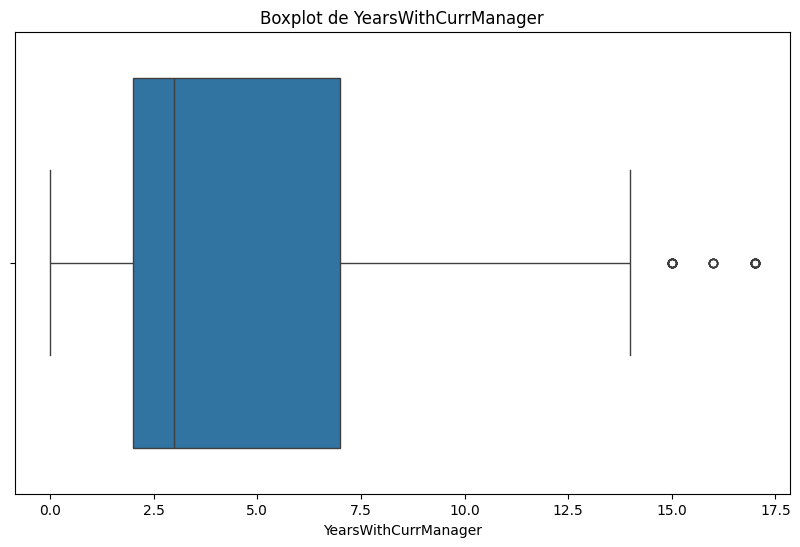

--------------------------------


In [19]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=general_data)
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()
    print(DELIMITER)

**Tableau descriptif** (pour les outliers)

| **Variable**               | **Observations**                                                                                       | **Interprétations**                                                                                  |
|----------------------------|-------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| **MonthlyIncome**          | La plupart des salaires sont entre 25,000 et 75,000, mais il existe des outliers au-delà de 150,000.  | Une minorité d'employés occupant probablement des postes très stratégiques ou avec des responsabilités élevées. |
| **NumCompaniesWorked**     | La majorité des employés a travaillé dans moins de 4 entreprises, mais il existe des outliers > 8.    | Quelques employés avec une forte mobilité inter-entreprises, ce qui peut indiquer une carrière instable ou très diversifiée. |
| **StockOptionLevel**       | La majorité des employés ont un niveau de stock option 0 ou 1, mais il y a des outliers au niveau 3.  | Indique des options d’achat d’actions limitées à des rôles stratégiques spécifiques dans l’entreprise. |
| **TotalWorkingYears**      | La plupart des employés ont entre 5 et 15 ans d'expérience, mais il existe des outliers > 30 ans.     | Une petite proportion d’employés très expérimentés, ce qui peut être un atout pour des rôles de mentorat ou d’expertise. |
| **TrainingTimesLastYear**  | La plupart des employés ont suivi entre 2 et 3 formations l'année dernière, avec des outliers > 5.    | Certains employés reçoivent beaucoup plus de formations, ce qui peut refléter une stratégie ciblée pour ces individus. |
| **YearsAtCompany**         | La majorité des employés sont dans l'entreprise depuis moins de 10 ans, mais des outliers dépassent 20 ans. | Une fidélité importante pour une minorité d’employés, reflétant des parcours de longue durée.          |
| **YearsSinceLastPromotion**| La majorité des employés n'ont pas été promus depuis moins de 3 ans, mais il existe des outliers > 10 ans. | Des plafonds de carrière pour certains employés, ce qui peut être un frein à la satisfaction et la rétention. |
| **YearsWithCurrManager**   | La plupart des employés ont travaillé moins de 7 ans avec leur manager actuel, mais il y a des outliers > 15 ans. | Une proportion limitée d’employés travaillant longtemps avec le même manager, indiquant une certaine stabilité dans des équipes spécifiques. |


──────────────────────────────────────────────────

#### 10.2. Traitement des outliers

##### 10.2.1. Définition de la fonction pour récupérer les outliers


In [20]:
def outliersList(data, column, multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

Cette fonction, basée sur la méthode de l'écart interquartile, va nous permettre de récupérer un DataFrame contenant toutes les lignes du dataset contenant un outlier pour une colonne donnée.

──────────────────────────────────────────────────

##### 10.2.2. `MonthlyIncome`

In [21]:
outliers_monthly_income = outliersList(general_data, 'MonthlyIncome')

print(f"Nombre de valeurs aberrantes pour MonthlyIncome : {len(outliers_monthly_income)}")
print("\nAperçu des valeurs aberrantes :")
display(outliers_monthly_income)

Nombre de valeurs aberrantes pour MonthlyIncome : 342

Aperçu des valeurs aberrantes :


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
55,33,No,Travel_Frequently,Research & Development,9,3,Life Sciences,1,56,Male,...,6.0,Y,12,8,1,12.0,3,10,8,8
56,39,No,Travel_Rarely,Sales,1,4,Life Sciences,1,57,Male,...,1.0,Y,22,8,1,21.0,6,21,11,10
73,27,No,Non-Travel,Research & Development,2,3,Life Sciences,1,74,Male,...,0.0,Y,17,8,0,6.0,3,5,1,4
76,45,No,Travel_Rarely,Sales,3,1,Marketing,1,77,Female,...,9.0,Y,14,8,1,12.0,6,10,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,30,No,Travel_Rarely,Human Resources,1,4,Human Resources,1,4320,Female,...,2.0,Y,12,8,1,12.0,0,10,7,4
4320,38,No,Travel_Rarely,Sales,1,1,Medical,1,4321,Male,...,4.0,Y,16,8,0,12.0,0,8,0,7
4360,40,No,Non-Travel,Research & Development,28,2,Life Sciences,1,4361,Male,...,9.0,Y,22,8,0,5.0,2,3,0,2
4377,59,No,Travel_Rarely,Research & Development,5,3,Life Sciences,1,4378,Female,...,3.0,Y,13,8,0,7.0,2,1,0,0


D'après le tableau ci-dessus, il semblerait que les valeurs aberrantes soient raisonnables car on peut retrouver des cas de figure tels que :
- Des employés avec un `TotalWorkingYears` élevé (comme l'employé n°4399)
- Des employés avec un niveau de `Education` élevé et un domaine `EducationField` indiquant un profil qualifié (comme l'employé n°56)
- Des employés avec un `StockOptionLevel` peu élevé et une `DistanceFromHome` élevée, reflétant un poste non stratégique (comme l'employé n°4360)

De part le fait que ces données semblent réalistes et cohérentes avec le contexte, nous pouvons les **conserver**.

──────────────────────────────────────────────────

##### 10.2.3. `NumCompaniesWorked`

In [22]:
outliers_num_companies_worked = outliersList(general_data, 'NumCompaniesWorked')

print(f"Nombre de valeurs aberrantes pour NumCompaniesWorked : {len(outliers_num_companies_worked)}")
print("\nAperçu des valeurs aberrantes :")
display(outliers_num_companies_worked)

Nombre de valeurs aberrantes pour NumCompaniesWorked : 156

Aperçu des valeurs aberrantes :


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
29,38,No,Travel_Rarely,Sales,2,3,Marketing,1,30,Female,...,9.0,Y,12,8,0,10.0,3,2,1,2
32,49,No,Travel_Frequently,Research & Development,1,1,Medical,1,33,Female,...,9.0,Y,13,8,0,22.0,2,3,1,2
76,45,No,Travel_Rarely,Sales,3,1,Marketing,1,77,Female,...,9.0,Y,14,8,1,12.0,6,10,9,8
113,29,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,114,Female,...,9.0,Y,12,8,1,6.0,6,3,1,2
114,35,No,Travel_Rarely,Research & Development,29,3,Life Sciences,1,115,Female,...,9.0,Y,15,8,0,10.0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4274,56,Yes,Travel_Rarely,Research & Development,15,3,Life Sciences,1,4275,Male,...,9.0,Y,19,8,0,7.0,1,5,4,3
4346,45,No,Non-Travel,Research & Development,9,2,Medical,1,4347,Female,...,9.0,Y,19,8,0,22.0,3,20,11,8
4350,38,No,Travel_Rarely,Sales,8,2,Marketing,1,4351,Male,...,9.0,Y,14,8,0,14.0,0,1,0,0
4360,40,No,Non-Travel,Research & Development,28,2,Life Sciences,1,4361,Male,...,9.0,Y,22,8,0,5.0,2,3,0,2


D'après le tableau ci-dessus, il semblerait que les valeurs aberrantes soient raisonnables car on peut retrouver des cas de figure tels que :
- Des employés concernés avec un âge relativement élevé (entre 35 et 56 ans), ce qui peut expliquer qu'ils aient travaillé dans plusieurs entreprises au cours de leur carrière
- Certains employés avec un `TotalWorkingYears` élevé (comme l'employé n°76 avec 10 ans), ce qui est cohérent avec un nombre plus important d'entreprises

Outre cela, on peut observer une certaine diversité dans les départements et les niveaux d'éducation, suggérant que ce n'est pas lié à un profil particulier

Ces observations indiquent que ces valeurs, bien qu'atypiques, reflètent des parcours professionnels réalistes. Nous pouvons donc les **conserver**.


──────────────────────────────────────────────────

##### 10.2.4. `StockOptionLevel`


In [23]:
outliers_stock_option_level = outliersList(general_data, 'StockOptionLevel')

print(f"Nombre de valeurs aberrantes pour StockOptionLevel : {len(outliers_stock_option_level)}")
print("\nAperçu des valeurs aberrantes :")
display(outliers_stock_option_level)

Nombre de valeurs aberrantes pour StockOptionLevel : 255

Aperçu des valeurs aberrantes :


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2.0,Y,22,8,3,10.0,2,0,0,0
16,21,No,Travel_Rarely,Research & Development,3,2,Life Sciences,1,17,Male,...,1.0,Y,12,8,3,3.0,3,3,1,0
63,31,No,Travel_Rarely,Sales,24,3,Life Sciences,1,64,Male,...,4.0,Y,11,8,3,13.0,4,7,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4309,58,No,Travel_Rarely,Sales,3,3,Marketing,1,4310,Female,...,4.0,Y,11,8,3,9.0,4,1,0,0
4328,33,No,Travel_Rarely,Research & Development,2,2,Medical,1,4329,Male,...,0.0,Y,18,8,3,4.0,4,3,0,2
4337,33,No,Travel_Rarely,Research & Development,4,3,Life Sciences,1,4338,Male,...,1.0,Y,11,8,3,8.0,6,8,1,6
4379,29,No,Travel_Frequently,Sales,15,4,Medical,1,4380,Female,...,1.0,Y,19,8,3,11.0,4,11,4,1


D'après le tableau ci-dessus, les valeurs aberrantes pour `StockOptionLevel` semblent réalistes pour plusieurs raisons :
 
- Les employés concernés ont des profils variés en termes d'âge (21 à 58 ans), de département et de niveau d'éducation, suggérant que le niveau d'options d'achat d'actions n'est pas lié à une caractéristique spécifique
- On observe une corrélation logique avec l'ancienneté : plusieurs employés ont un nombre significatif d'années dans l'entreprise (par exemple, 11 ans pour l'employé n°4379), ce qui peut justifier un niveau plus élevé d'options d'achat d'actions comme récompense pour leur fidélité
- Le taux d'attrition est relativement faible parmi ces employés, ce qui est cohérent avec l'attribution d'options d'achat d'actions comme outil de rétention
 
Ces observations suggèrent que ces valeurs, bien qu'atypiques statistiquement, reflètent des situations professionnelles plausibles. Nous pouvons donc les **conserver**.

──────────────────────────────────────────────────

##### 10.2.5. `TotalWorkingYears`

In [24]:
outliers_total_working_years = outliersList(general_data, 'TotalWorkingYears')

print(f"Nombre de valeurs aberrantes pour TotalWorkingYears : {len(outliers_total_working_years)}")
print("\nAperçu des valeurs aberrantes :")
display(outliers_total_working_years)

Nombre de valeurs aberrantes pour TotalWorkingYears : 189

Aperçu des valeurs aberrantes :


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
12,55,No,Travel_Rarely,Research & Development,14,4,Life Sciences,1,13,Female,...,0.0,Y,17,8,0,37.0,2,36,4,13
121,55,No,Travel_Rarely,Sales,26,3,Marketing,1,122,Male,...,2.0,Y,13,8,0,30.0,3,5,1,2
143,56,No,Travel_Frequently,Research & Development,20,4,Life Sciences,1,144,Female,...,9.0,Y,14,8,0,36.0,1,7,7,7
150,52,No,Travel_Rarely,Research & Development,12,3,Medical,1,151,Male,...,2.0,Y,11,8,1,31.0,3,5,1,4
153,60,No,Travel_Rarely,Research & Development,10,3,Life Sciences,1,154,Female,...,5.0,Y,18,8,1,33.0,4,29,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4278,58,Yes,Travel_Rarely,Sales,2,2,Medical,1,4279,Female,...,1.0,Y,13,8,1,40.0,2,40,15,6
4339,55,No,Travel_Rarely,Research & Development,6,1,Life Sciences,1,4340,Female,...,8.0,Y,17,8,0,36.0,0,24,2,15
4342,52,No,Travel_Rarely,Research & Development,2,4,Medical,1,4343,Female,...,0.0,Y,11,8,1,34.0,3,33,11,9
4385,50,No,Travel_Rarely,Research & Development,11,2,Life Sciences,1,4386,Male,...,3.0,Y,23,8,1,32.0,2,7,0,6


D'après le tableau ci-dessus, les valeurs aberrantes pour `TotalWorkingYears` semblent réalistes pour plusieurs raisons :
- Les employés concernés sont majoritairement âgés (52-60 ans), ce qui est cohérent avec un nombre élevé d'années d'expérience professionnelle
- Il existe une corrélation logique entre l'âge et le nombre total d'années de travail : par exemple, un employé de 58 ans avec 40 ans d'expérience a probablement commencé à travailler vers 18 ans
- La distribution des départements et des niveaux d'éducation est variée, suggérant qu'il n'y a pas de biais particulier
- Le taux d'attrition est relativement faible dans ce groupe, ce qui est cohérent avec des employés expérimentés et stables dans leur carrière

Ces observations indiquent que ces valeurs, bien qu'atypiques statistiquement, reflètent des parcours professionnels réalistes. Nous pouvons donc les **conserver**.

──────────────────────────────────────────────────

##### 10.2.6. `TrainingTimesLastYear`

In [25]:
outliers_training_times_last_year = outliersList(general_data, 'TrainingTimesLastYear')

print(f"Nombre de valeurs aberrantes pour TrainingTimesLastYear : {len(outliers_training_times_last_year)}")
print("\nAperçu des valeurs aberrantes :")
display(outliers_training_times_last_year)

Nombre de valeurs aberrantes pour TrainingTimesLastYear : 714

Aperçu des valeurs aberrantes :


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
18,35,No,Travel_Rarely,Sales,7,4,Life Sciences,1,19,Male,...,7.0,Y,16,8,0,10.0,5,7,6,2
19,38,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,20,Female,...,1.0,Y,11,8,1,8.0,5,8,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,37,No,Travel_Frequently,Sales,2,4,Life Sciences,1,4375,Male,...,1.0,Y,15,8,1,10.0,5,10,0,7
4380,35,No,Travel_Frequently,Research & Development,19,3,Life Sciences,1,4381,Female,...,1.0,Y,13,8,0,10.0,6,10,0,8
4382,52,No,Travel_Rarely,Research & Development,1,2,Medical,1,4383,Female,...,7.0,Y,14,8,0,6.0,5,2,2,2
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2


D'après le tableau ci-dessus, les valeurs aberrantes pour `TrainingTimesLastYear` semblent réalistes pour plusieurs raisons :
- Le nombre de formations suivies (6) reste raisonnable et réalisable sur une année
- Ces employés sont répartis de manière équilibrée entre les différents départements et niveaux d'ancienneté
- Le taux d'attrition est faible dans ce groupe, suggérant que ces formations font partie d'un parcours professionnel normal
- Les autres indicateurs (âge, expérience, etc.) ne montrent pas de particularités qui remettraient en cause la validité de ces données
 
Ces observations indiquent que ces valeurs, bien qu'atypiques statistiquement, reflètent probablement une réalité professionnelle où certains employés suivent plus de formations que la moyenne. Nous pouvons donc les **conserver**.

──────────────────────────────────────────────────

##### 10.2.7. `YearsAtCompany`


In [26]:
outliers_years_at_company = outliersList(general_data, 'YearsAtCompany')

print(f"Nombre de valeurs aberrantes pour YearsAtCompany : {len(outliers_years_at_company)}")
print("\nAperçu des valeurs aberrantes :")
display(outliers_years_at_company)

Nombre de valeurs aberrantes pour YearsAtCompany : 312

Aperçu des valeurs aberrantes :


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
10,45,No,Travel_Rarely,Research & Development,17,2,Medical,1,11,Male,...,0.0,Y,13,8,2,21.0,2,20,4,10
12,55,No,Travel_Rarely,Research & Development,14,4,Life Sciences,1,13,Female,...,0.0,Y,17,8,0,37.0,2,36,4,13
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,1,24,Male,...,1.0,Y,14,8,0,10.0,4,20,11,6
37,42,No,Travel_Frequently,Sales,2,2,Marketing,1,38,Male,...,5.0,Y,13,8,0,23.0,2,20,4,8
42,41,No,Travel_Rarely,Research & Development,29,1,Life Sciences,1,43,Male,...,1.0,Y,12,8,0,22.0,6,22,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,42,No,Travel_Rarely,Research & Development,7,4,Life Sciences,1,4384,Female,...,1.0,Y,11,8,2,22.0,2,22,11,15
4389,52,No,Non-Travel,Research & Development,2,3,Technical Degree,1,4390,Male,...,1.0,Y,14,8,0,33.0,3,33,15,12
4396,45,No,Travel_Rarely,Research & Development,18,1,Life Sciences,1,4397,Female,...,0.0,Y,14,8,0,25.0,4,24,1,7
4403,39,No,Travel_Frequently,Research & Development,22,3,Medical,1,4404,Female,...,0.0,Y,19,8,1,20.0,2,19,11,8


D'après le tableau ci-dessus, les valeurs aberrantes pour `YearsAtCompany` semblent réalistes pour plusieurs raisons :
- Les employés concernés sont généralement plus âgés (40-60 ans) et ont une longue expérience professionnelle totale (20-33 ans), ce qui est cohérent avec une longue ancienneté dans l'entreprise
- Le ratio entre `YearsAtCompany` et `TotalWorkingYears` est en apparence logique : par exemple, un employé avec 33 ans d'expérience totale qui a passé 20 ans dans l'entreprise
- La distribution des départements est équilibrée, suggérant qu'il n'y a pas de biais particulier
- Le taux d'attrition est faible dans ce groupe, ce qui est cohérent avec des employés fidèles à l'entreprise
- Les valeurs de `YearsWithCurrManager` sont proportionnelles aux années dans l'entreprise, montrant une cohérence dans les données

Ces observations indiquent que ces valeurs, bien qu'atypiques statistiquement, représentent des parcours professionnels réalistes et cohérents. Nous pouvons donc les **conserver**.

──────────────────────────────────────────────────

##### 10.2.8. `YearsSinceLastPromotion`


In [27]:
outliers_years_since_last_promotion = outliersList(general_data, 'YearsSinceLastPromotion')

print(f"Nombre de valeurs aberrantes pour YearsSinceLastPromotion : {len(outliers_years_since_last_promotion)}")
print("\nAperçu des valeurs aberrantes :")
display(outliers_years_since_last_promotion)

Nombre de valeurs aberrantes pour YearsSinceLastPromotion : 321

Aperçu des valeurs aberrantes :


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
11,36,No,Travel_Rarely,Research & Development,28,1,Life Sciences,1,12,Male,...,0.0,Y,12,8,2,16.0,2,15,10,11
13,47,Yes,Non-Travel,Research & Development,1,1,Medical,1,14,Male,...,1.0,Y,11,8,2,10.0,4,10,9,9
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,1,24,Male,...,1.0,Y,14,8,0,10.0,4,20,11,6
53,45,No,Travel_Frequently,Research & Development,3,1,Medical,1,54,Female,...,1.0,Y,13,8,0,24.0,6,24,9,11
55,33,No,Travel_Frequently,Research & Development,9,3,Life Sciences,1,56,Male,...,6.0,Y,12,8,1,12.0,3,10,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4362,32,Yes,Travel_Rarely,Research & Development,5,3,Medical,1,4363,Male,...,1.0,Y,11,8,0,14.0,2,14,9,8
4370,45,No,Non-Travel,Research & Development,2,3,Medical,1,4371,Female,...,6.0,Y,12,8,2,23.0,2,19,12,8
4383,42,No,Travel_Rarely,Research & Development,7,4,Life Sciences,1,4384,Female,...,1.0,Y,11,8,2,22.0,2,22,11,15
4389,52,No,Non-Travel,Research & Development,2,3,Technical Degree,1,4390,Male,...,1.0,Y,14,8,0,33.0,3,33,15,12


D'après le tableau ci-dessus, les valeurs aberrantes pour `YearsSinceLastPromotion` méritent une analyse approfondie :
 
- On observe des valeurs élevées (9-15 ans) qui peuvent sembler préoccupantes au premier abord
- Cependant, plusieurs éléments suggèrent que ces données sont valides :
  - Ces employés ont généralement une longue ancienneté dans l'entreprise (>15 ans)
  - Leur âge (40-50 ans) et expérience totale sont cohérents avec ces durées
  - Le taux d'attrition n'est pas particulièrement élevé dans ce groupe
  - La distribution entre départements reste équilibrée
- Ces cas peuvent représenter des situations réelles où :
  - L'employé est satisfait de son poste actuel
  - L'employé a atteint un plafond dans sa progression de carrière
  - Les opportunités de promotion sont limitées dans certains départements

En conclusion, bien que ces valeurs soient aberrantes, elles semblent refléter des situations professionnelles plausibles. Nous pouvons donc les conserver.

──────────────────────────────────────────────────

##### 10.2.9. `YearsWithCurrManager`

In [28]:
outliers_years_with_curr_manager = outliersList(general_data, 'YearsWithCurrManager')

print(f"Nombre de valeurs aberrantes pour YearsWithCurrManager : {len(outliers_years_with_curr_manager)}")
print("\nAperçu des valeurs aberrantes :")
display(outliers_years_with_curr_manager)

Nombre de valeurs aberrantes pour YearsWithCurrManager : 42

Aperçu des valeurs aberrantes :


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
128,37,No,Travel_Rarely,Research & Development,10,1,Technical Degree,1,129,Male,...,1.0,Y,14,8,1,18.0,3,18,12,17
303,52,No,Travel_Rarely,Sales,21,5,Technical Degree,1,304,Male,...,1.0,Y,11,8,1,34.0,2,34,1,16
358,51,No,Travel_Rarely,Sales,16,3,Medical,1,359,Male,...,2.0,Y,15,8,3,29.0,0,20,4,17
377,35,No,Travel_Rarely,Research & Development,9,2,Life Sciences,1,378,Female,...,1.0,Y,13,8,1,17.0,2,17,5,15
428,41,No,Travel_Rarely,Research & Development,1,4,Medical,1,429,Male,...,2.0,Y,13,8,0,20.0,5,18,2,17
617,44,No,Travel_Rarely,Research & Development,3,4,Medical,1,618,Male,...,1.0,Y,12,8,3,20.0,3,20,13,17
668,43,No,Travel_Rarely,Research & Development,7,2,Medical,1,669,Female,...,3.0,Y,18,8,2,23.0,3,21,15,17
820,44,No,Travel_Rarely,Sales,26,1,Marketing,1,821,Male,...,3.0,Y,11,8,1,24.0,5,20,14,17
1090,40,No,Travel_Rarely,Research & Development,3,3,Other,1,1091,Male,...,2.0,Y,13,8,0,22.0,3,19,11,16
1240,44,No,Travel_Rarely,Research & Development,3,1,Life Sciences,1,1241,Female,...,3.0,Y,15,8,2,24.0,0,22,5,17


D'après le tableau ci-dessus, les valeurs aberrantes pour `YearsWithCurrManager` nécessitent une analyse détaillée :

- Les valeurs identifiées comme aberrantes (15-17 ans) sont élevées mais peuvent être justifiées :
  - Ces employés ont généralement une longue ancienneté dans l'entreprise (>17 ans)
  - Leur âge (40-50 ans) correspond à des carrières établies
  - La distribution entre départements reste équilibrée
  - Le taux d'attrition n'est pas particulièrement élevé dans ce groupe
- Ces durées importantes avec le même manager peuvent s'expliquer par :
  - Une bonne relation professionnelle et une stabilité appréciée
  - Des équipes performantes que l'entreprise souhaite maintenir
  - Des départements ou postes spécialisés avec peu de rotation

En conclusion, bien que ces valeurs soient aberrantes, elles semblent représenter des situations professionnelles réalistes et cohérentes. Nous pouvons donc les **conserver**.

---

### 11. <a id='correlation'>Analyse des corrélations</a>

##### 11.1. Colonnes numériques

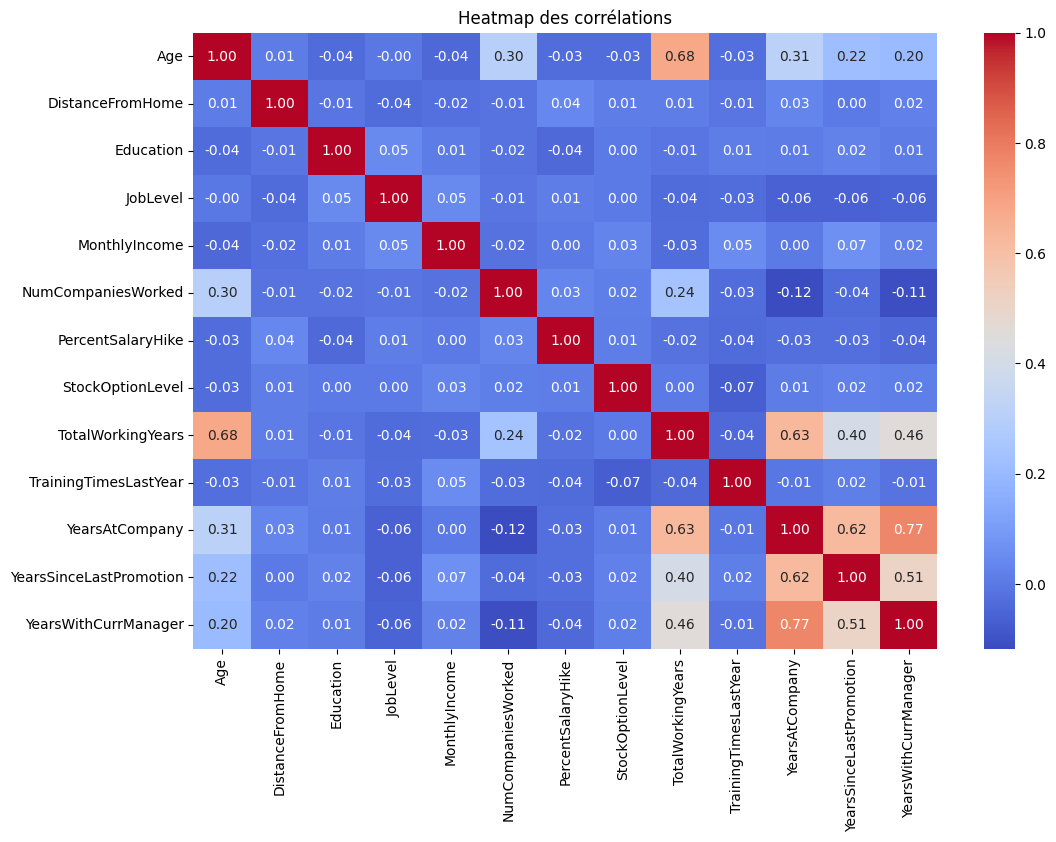

In [31]:
corr_matrix = general_data[numerical_columns].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap des corrélations')
plt.show()

**Tableau descriptif**

| **Paire de variables**              | **Corrélation** | **Interprétation**                                                                                      |
|-------------------------------------|-----------------|---------------------------------------------------------------------------------------------------------|
| **Age et TotalWorkingYears**        | 0.68            | Forte corrélation positive : les employés plus âgés ont généralement plus d'années d'expérience totale. |
| **TotalWorkingYears et YearsAtCompany** | 0.63         | Forte corrélation positive : une longue expérience totale est souvent associée à une longue durée dans l'entreprise. |
| **YearsAtCompany et YearsWithCurrManager** | 0.77       | Très forte corrélation positive : les employés restant longtemps dans l'entreprise travaillent souvent longtemps avec leur manager actuel. |
| **YearsSinceLastPromotion et YearsAtCompany** | 0.62     | Corrélation modérée positive : les employés ayant passé plus d'années dans l'entreprise attendent souvent plus longtemps pour une promotion. |


──────────────────────────────────────────────────

##### 11.2. Colonnes catégoriques

11.2.1. Méthode V de Cramer

Pour les colonnes catégoriques, nous allons utiliser la méthode Cramer's V<sup>[[1]](https://www.kaggle.com/code/muhammetgamal5/categorical-variables-correlation-cramer-s-v)</sup><sup>[[2]](https://www.ibm.com/docs/en/cognos-analytics/12.0.0?topic=terms-cramrs-v)</sup> pour déterminer la corrélation entre chaque colonne

In [40]:
from scipy.stats import chi2_contingency

def cramers_v(col1, col2):
    # Création d'une table de contingence, qui va compter le nombre de fois que chaque combinaison de col1 et col2 apparaît
    contingency_table = pd.crosstab(col1, col2)
    
    # Calcul de Khi-2
    # - chi2 : Statistique qui va mesurer la différence entre les valeurs observées (dans la table) et les valeurs attendues si les deux colonnes étaient indépendantes
    # - p_value : Probabilité associée au test du Khi-2 (non utilisée car on se concentre sur Cramer's V)
    # - dof : Degré de liberté (non utilisé)
    # - expected : Table de valeurs attendues 
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Nombre total d'observations dans la table
    n = contingency_table.sum().sum()

    min_dim = min(contingency_table.shape) - 1
    
    # Normalisation du résultat du test de Khi-2 avec min_dim pour obtenir un score entre 0 et 1
    cramers_v = np.sqrt(chi2 / (n * min_dim))
    
    return cramers_v

──────────────────────────────────────────────────

11.2.2. Génération de la heatmap

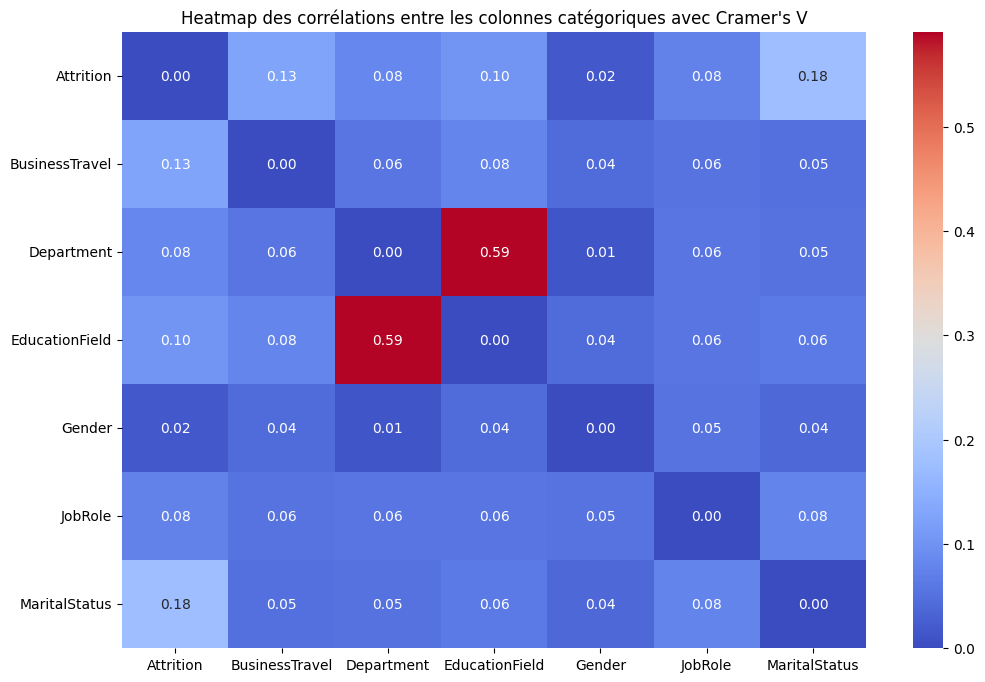

In [41]:
corr_matrix = pd.DataFrame(
    np.zeros((len(categorical_columns), len(categorical_columns))),
        index=categorical_columns, columns=categorical_columns
)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            corr_matrix.loc[col1, col2] = cramers_v(general_data[col1], general_data[col2])

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Heatmap des corrélations entre les colonnes catégoriques avec Cramer's V")
plt.show()

**Points notables**
- Corrélation positive modérée entre `EducationField` et `Department`, ce qui fait sens car certains domaines d'études sont naturellement plus représentés dans certains départements (par exemple, les diplômés en R&D sont plus susceptibles de travailler dans le département R&D)


---

In [ ]:
# Scatterplot EnvironmentSatisfaction - JobSatisfaction
sns.scatterplot(data=general_data, x='EnvironmentSatisfaction', y='JobSatisfaction', color='blue')
plt.title('Relation entre EnvironmentSatisfaction et JobSatisfaction')
plt.show()

In [ ]:
# Scatterplot EnvironmentSatisfaction - WorkLifeBalance
sns.scatterplot(data=general_data, x='EnvironmentSatisfaction', y='WorkLifeBalance', color='blue')
plt.title('Relation entre EnvironmentSatisfaction et WorkLifeBalance')
plt.show()

In [ ]:
# Scatterplot JobSatisfaction - WorkLifeBalance
sns.scatterplot(data=general_data, x='JobSatisfaction', y='WorkLifeBalance', color='blue')
plt.title('Relation entre JobSatisfaction et WorkLifeBalance')
plt.show()

In [ ]:
# Kdeplot EnvironmentSatisfaction - JobSatisfaction
sns.kdeplot(x=general_data['EnvironmentSatisfaction'], y=general_data['JobSatisfaction'], fill=True, cmap="Reds", alpha=0.5)

# Superposition avec un scatterplot pour plus de clarté
sns.scatterplot(x=general_data['EnvironmentSatisfaction'], y=general_data['JobSatisfaction'], color="black", alpha=0.7)

plt.title("KDEplot EnvironmentSatisfaction - JobSatisfaction avec scatterplot")
plt.show()


In [ ]:
# KDEplot EnvironmentSatisfaction - WorkLifeBalance
sns.kdeplot(x=general_data['EnvironmentSatisfaction'], y=general_data['WorkLifeBalance'], fill=True, cmap="Reds", alpha=0.5)

sns.scatterplot(x=general_data['EnvironmentSatisfaction'], y=general_data['WorkLifeBalance'], color="black", alpha=0.7)

plt.title("KDEplot EnvironmentSatisfaction - WorkLifeBalance avec scatterplot")
plt.show()

In [ ]:
# KDEplot JobSatisfaction - WorkLifeBalance
sns.kdeplot(x=general_data['JobSatisfaction'], y=general_data['WorkLifeBalance'], fill=True, cmap="Reds", alpha=0.5)

sns.scatterplot(x=general_data['JobSatisfaction'], y=general_data['WorkLifeBalance'], color="black", alpha=0.7)

plt.title("KDEplot JobSatisfaction - WorkLifeBalance avec scatterplot")
plt.show()